# Speaker Diarization and Automatic Speech Recognition

> Diarization: Using Pyannote


>Speech-to-Text: Using openai whisper-large v-3





## Introduction
**Purpose**: This code performs speaker diarization and maps the speech to text using pyannote for diarization and the large-v3 Whisper model for speech-to-text conversion.

**Overview**: The code processes audio files to identify different speakers and transcribe their spoken content into text.



## Setup and Installation
**Prerequisites**:
- Python
- pyannote.audio
- openai-whisper
- Pipeline
- whisper
- List of required libraries: librosa, pydub, ffmpeg, SpeechRecognnition

**Version:**

SpeechRecognition==3.10.4

pyannote.audio==3.2.0

Pipeline==7.2.2

ffmpeg==3.4.13

pydub==0.25.1



In [1]:
!pip install openai-whisper pyannote.audio ffmpeg langdetect pydub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51

In [2]:
!pip install Pipeline whisper SpeechRecognition


  Using cached pipeline-0.1.0-py3-none-any.whl (2.6 kB)
  Using cached whisper-1.1.10-py3-none-any.whl
  Using cached SpeechRecognition-3.10.4-py2.py3-none-any.whl (32.8 MB)


Import the necessary libraries:

In [3]:
import os
from pydub import AudioSegment
import librosa
import numpy as np
from pyannote.audio import Pipeline
from pyannote.core import Segment, Annotation

In [5]:
!pip install pydub
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [4]:
# This gives different tasks available for pyannote pipeline
from huggingface_hub import HfApi
available_pipelines = [p.modelId for p in HfApi().list_models(filter="pyannote-audio-pipeline")]
list(filter(lambda p: p.startswith("pyannote/"), available_pipelines))

['pyannote/overlapped-speech-detection',
 'pyannote/speaker-diarization',
 'pyannote/speaker-segmentation',
 'pyannote/voice-activity-detection',
 'pyannote/speaker-diarization-3.0',
 'pyannote/speaker-diarization-3.1',
 'pyannote/speech-separation-ami-1.0']



---



**Audio file format conversion**

This is to convert any form of Audio into .wav format using pydub library which is required for the model used.


In [ ]:
# Convert the uploaded file to WAV
from pydub import AudioSegment

# Define the path to the input and output files
input_file = 'conversation1.mpeg'
output_file = 'conversation1.wav'

audio = AudioSegment.from_file(input_file)
audio.export(output_file, format="wav")

print(f"File has been converted to WAV and saved as {output_file}")

# Download the converted file
from google.colab import files
files.download(AUDIO_FILE)

File has been converted to WAV and saved as conversation1.wav


**Load the Audio File Using Librosa**

We will load the WAV file using the librosa library to check the number of audio samples.

In [ ]:
AUDIO_FILE = "conversation2.wav"  # This stores the audio file path in this variable name

In [ ]:
import librosa

audio, sr = librosa.load(output_file, sr=16000)
num_samples = len(audio)

print("Number of samples:", num_samples)


Number of samples: 1267253


**Visualization: Load the Audio File and Plot the Waveform**

We will load the audio file using librosa and plot the waveform to visualize the audio data.

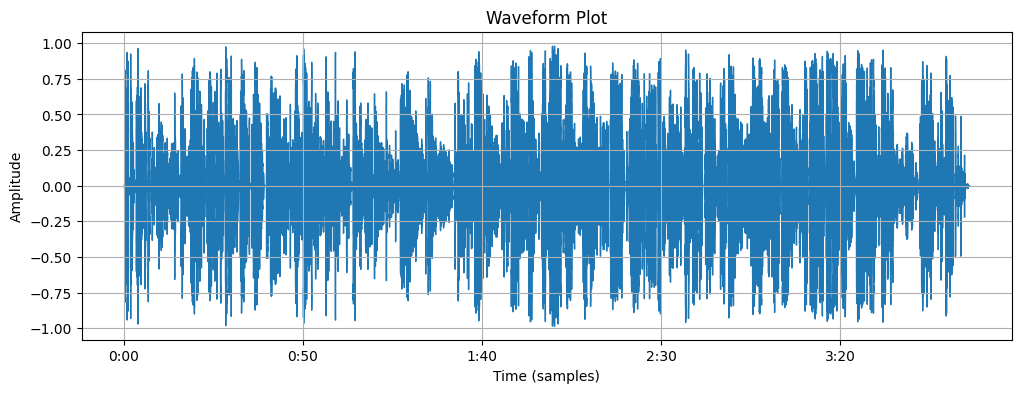

In [ ]:
import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load(AUDIO_FILE )

plt.figure(figsize=(12, 4))
data, sample_rate = librosa.load(AUDIO_FILE )
librosa.display.waveshow(data, sr=sample_rate)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Waveform Plot")
plt.grid(True)
plt.show()




**Play the Audio File:**

Additionally, we can play the audio file within the notebook to listen to its content using IPython.display

In [ ]:
import IPython.display as ipd
ipd.Audio(AUDIO_FILE)


**Calculate the Duration of the Audio File:**

This code is to calculate and print the duration of the audio file using librosa.

In [ ]:
audio_duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {audio_duration:.2f} seconds")

Audio duration: 236.05 seconds


In [ ]:
output_file

'conversation2.wav'



---



# PYANNOTE Installation for Speaker Diarization Information

We will use the pyannote.audio library to perform speaker diarization on the audio file. This process will identify different speakers and segment the audio accordingly.

In [10]:
from google.colab import userdata
Huggingface_pyyanote_TOKEN=userdata.get("pyyanote_diarization")

In [11]:
from pyannote.audio import Pipeline

pipeline = Pipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1",
    use_auth_token=Huggingface_pyyanote_TOKEN)

config.yaml:   0%|          | 0.00/469 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

This initializes the speaker diarization pipeline using the specified pre-trained model.

Pipeline.from_pretrained:

- "pyannote/speaker-diarization-3.1": Specifies the pre-trained model to use for speaker diarization.
- use_auth_token: This parameter requires an authentication token to access the pre-trained model. This "Huggingface_pyyanote_TOKEN" is the actual Hugging Face authentication token with granted access.

In [ ]:
combined_annotation = pipeline(AUDIO_FILE, num_speakers=2)  # Use of "pipeline" object which is created above and



This processes the audio file and performs speaker diarization and store it in "combined_annotation" variable.

pipeline(AUDIO_FILE, num_speakers=2):

- AUDIO_FILE: The path to the audio file to be processed.
- num_speakers: The estimated number of speakers in the audio file. Adjust this number based on your specific audio data.



**Print the Diarization Results:**

In [ ]:
for turn, _, speaker in combined_annotation.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

start=0.0s stop=0.2s speaker_SPEAKER_01
start=1.3s stop=5.2s speaker_SPEAKER_01
start=5.9s stop=10.9s speaker_SPEAKER_00
start=11.0s stop=11.0s speaker_SPEAKER_00
start=11.1s stop=13.5s speaker_SPEAKER_00
start=14.0s stop=15.3s speaker_SPEAKER_00
start=16.0s stop=16.5s speaker_SPEAKER_00
start=17.2s stop=19.0s speaker_SPEAKER_01
start=19.4s stop=20.0s speaker_SPEAKER_00
start=20.3s stop=21.8s speaker_SPEAKER_00
start=22.1s stop=28.3s speaker_SPEAKER_00
start=28.6s stop=30.6s speaker_SPEAKER_01




This iterates over the diarization results(combined_annotation) and prints the start and stop times of each speech segment, along with the identified speaker label.


---


# Whisper Model (openai/whisper-large-v3) Installation for Speech recognition.


**Load and Prepare Whisper Model for Speech-to-Text**

We will use the transformers library to load and prepare the Whisper model for automatic speech recognition (ASR). This model will convert the spoken content of the audio file into text.

In [ ]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline

# Determine the device to use (GPU if available, otherwise CPU)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

# Specify the model ID for the Whisper model
model_id = "openai/whisper-large-v3"

# Load the pre-trained Whisper model
model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, use_safetensors=True
)
model.to(device)



config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(128, 1280, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(1280, 1280, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 1280)
      (layers): ModuleList(
        (0-31): 32 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=1280, out_features=1280, bias=False)
            (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (fc2): Linear(in_features=5120, out_features=1280, bia

**AutoModelForSpeechSeq2Seq.from_pretrained:** This loads the pre-trained Whisper model and moves it to the specified device.

- model_id: Specifies the pre-trained model ID to load, which in this case is "openai/whisper-large-v3".

- torch_dtype: Specifies the data type for the model, using torch.float16 if a GPU is available, otherwise torch.float32.

- use_safetensors: Enables the use of safetensors for model loading.


In [ ]:
# Load the processor for the Whisper model
processor = AutoProcessor.from_pretrained(model_id)

# Create an ASR pipeline
pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=30,
    batch_size=16,
    return_timestamps=True,


    torch_dtype=torch_dtype,
    device=device,
)



preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1. **AutoProcessor.from_pretrained**:
This loads the processor associated with the Whisper model, which includes the tokenizer and feature extractor.
- model_id: Specifies the pre-trained processor ID to load, which matches the model ID.




2. **pipeline:** This creates an ASR pipeline for processing audio files, using the loaded model and processor components.
- "automatic-speech-recognition": Specifies the task type for the pipeline, which is automatic speech recognition (ASR).
- model: The pre-trained Whisper model loaded earlier.
- tokenizer: The tokenizer component of the processor.
- feature_extractor: The feature extractor component of the processor.
- max_new_tokens: Maximum number of new tokens to generate during transcription.
- chunk_length_s: Length of audio chunks in seconds to process at a time.
- batch_size: Number of audio chunks to process in parallel.
- return_timestamps: Whether to return timestamps for the transcriptions.
- torch_dtype: Specifies the data type for the pipeline, using torch.float16 if a GPU is available, otherwise torch.float32.
- device: Specifies the device to run the pipeline on (GPU or CPU)

**Transcribe the Audio File**

We will use the ASR pipeline created earlier to transcribe the audio file. The transcription process will convert the spoken content into text and include timestamps for each segment.

In [ ]:
# Transcribe the audio file using the ASR pipeline
transcription_result  = pipe(AUDIO_FILE, return_timestamps=True , generate_kwargs={"language": "english", "task": "translate"})




- AUDIO_FILE: The path to the audio file to be transcribed.
- return_timestamps: When set to True, the transcription will include timestamps for each segment of the spoken content.
- generate_kwargs: Additional arguments for the transcription generation.
- language: Specifies the language of the audio content, set to "english" in this case.
- task: Specifies the task for the ASR model, set to "translate" or "transcribe" for translating and transcribing the audio accordingly.

**Display the Transcription Result:**

In [ ]:
transcription_result

{'text': " Hello. Hello. Hey. Yes. Hi. Hi. Yes. Yes. How are you? Hey, I'm good. I'm good. I'm so sorry. I was not able to respond to you. Hey, no. Little little in the middle of something also today. Okay. Can we speak on Friday? Is that working fine for you? Sure. So just just taking two minutes of your time, we just want to No, no, I want to I want to honestly, I did use it for some time and I got busy with some things I did not update it much but it is, I was you know, whenever I would get a reminder I would say, okay, I have to do it that's a good feature, I am very happy and everything I am fairly positive on the entire thing. Okay. Friday, maybe I will connect with you again. Super. And whatever else I can add on, I will try and share with you. Definitely. So do you think Friday sometime in second half, we can maybe plan for... Sounds good. Sounds good. Friday, second half sounds can maybe like plan for sounds good sounds good friday second half sounds good super super i'll send



This prints the transcription result, which includes the transcribed text along with timestamps for each segment.

In [ ]:
transcription_result

{'text': " Hello Puneet Ji, how are you? Hey, Hi Utkarsh How are you? I am good, how are you? Great, great Utkarsh, I wanted to check with you It's been a while we gave the app Salesman for Ikshit to use Was he able to use it? Did you see any benefit? No, now Puneet Ji To be very honest, now we are running a campaign Offline So the leads that will come in that, from March 1st week, oh April 1st week, we are thinking to manage with the app because it will make our life work easier. Okay. So, then we would be able to test the potential of the app. Because I am so busy with the campaign that I am not even able to go home on Holi. Okay. So, that's why we said that we need something for leads and management. So I thought we'll use the apps that you have. Got it. Got it. So I'll give you a full review of the app. Because you can see from your side that we haven't used it that much. Because everyone is trying to define the campaign. Correct. That is what I was trying to come to. Because we ar

In [ ]:
transcription_result

{'text': " Hello Puneet Ji, how are you? Hey, hi Utkarsh. How are you? All good. All good. All good. All good. All good. All good. All good. All good. All good. All good. All good. All good. All good. All good. All potential of the app. Because then I am so busy in the campaign that I am not able to go home on Holi. Okay. Okay. So, then we said that we need something for leads and management. Then I said we'll use the apps that you have. Got it. Got it. So I'll give you a full review of the app. Because you can see from your side that we haven't used it much. Because everyone is trying to define the campaign. Correct. That is what I was trying to come to because we are closing the pilot. So I just want to make sure that either we start using or we can like... No, no, we have. We will for sure be using the app because when the campaign will start, the leads will also come. So can you give us an idea by when we should connect to get tangible feedback on this? If it's okay with you, can w

In [ ]:
transcription_result

{'text': " अलग पुनित जी क्या है लुट पुणित जी क्या है लुट पुणित जी क्या है लुट पुणित जी क्या है लुट पुणित जी क्या ही लीड्स आइंगी ना प्रमाच फर्स्ट वीक और एप्रेल फर्स्ट वीक वह वियर्ड थिंग इंटरमेंट अब विकल्प में का लाइ फिर हमने का कि लीज मैनेजमेंट के लिए कुछ तो चाहिए तो मैंने अपनी जिन आप देख रखा है वह यूज कर वी साट यूजिंग और वीडियो नो वी है वी वी वी वी विल फॉर सर वी यूजिंग द आपको जब यह �-12 दिन में सारी lead management और सब कुछ हो जाएगा बहुत असानी से अच्छा अच्छा and then that would come really handy to us and we'll know how much we can use it and how much user we need at the momentनीजी विल्स ऑल ली हेल्प यू आउट श�ि जैसे वेब डेवलपिंग क्लाइंट सो सोशल मीडिया कंटेंट क्रिएशन करवाना मार्केटिंग करने किसे ठीक है तो अभी एप्रेल फर्स्ट वीक से विल बी ओपन टू एवरी क्लाइंट वी आर रिसीविंग और अगर उनका बजट थो� में की वर्किंग आग जितने लगेंगे चार्जें उससे मैंने जो जाते हैं कि तो सेम गोज़ विद मार्केटिंग ओली की मारर सेजेस्ट करा क्योंकि प्लान रखने से ने चीजें बहुत कंफाइन हो जाती है अब मैं आपको पिछ कर दो यह आपको 



---




**Collect Speaker Segments**





First, we will extract the speaker segments from the diarization results and store them in a list.

In [ ]:
# Collect speaker segments
speaker_segments = []
for turn, _, speaker in combined_annotation.itertracks(yield_label=True):
    speaker_segments.append({
        "start": turn.start,
        "end": turn.end,
        "speaker": speaker
    })


 Display the collected speaker segments

In [ ]:
speaker_segments

[{'start': 0.03096875, 'end': 1.16159375, 'speaker': 'SPEAKER_00'},
 {'start': 1.6172187500000001, 'end': 2.86596875, 'speaker': 'SPEAKER_01'},
 {'start': 3.25409375, 'end': 6.13971875, 'speaker': 'SPEAKER_01'},
 {'start': 3.4734687500000003, 'end': 4.31721875, 'speaker': 'SPEAKER_00'},
 {'start': 5.684093750000001,
  'end': 6.122843750000001,
  'speaker': 'SPEAKER_00'},
 {'start': 6.544718750000001,
  'end': 7.202843750000001,
  'speaker': 'SPEAKER_01'},
 {'start': 7.5572187500000005,
  'end': 8.012843750000002,
  'speaker': 'SPEAKER_01'},
 {'start': 8.232218750000001,
  'end': 8.637218750000002,
  'speaker': 'SPEAKER_01'},
 {'start': 9.059093750000002, 'end': 15.31971875, 'speaker': 'SPEAKER_01'},
 {'start': 15.724718750000001, 'end': 18.67784375, 'speaker': 'SPEAKER_01'},
 {'start': 15.74159375, 'end': 16.14659375, 'speaker': 'SPEAKER_00'},
 {'start': 18.44159375, 'end': 22.59284375, 'speaker': 'SPEAKER_00'},
 {'start': 23.01471875, 'end': 29.96721875, 'speaker': 'SPEAKER_00'},
 {'s

**Collect Transcription Segments with Timestamps**

We will extract the transcription segments from the ASR results, which include timestamps.



In [ ]:
# Collect transcription segments with timestamps
transcription_segments = transcription_result["chunks"]

 Display the collected transcription segments

In [ ]:
transcription_segments

[{'timestamp': (0.0, 25.46),
  'text': " Hello. Hello. Hey. Yes. Hi. Hi. Yes. Yes. How are you? Hey, I'm good. I'm good. I'm so sorry. I was not able to respond to you. Hey, no. Little little in the middle of something also today. Okay. Can we speak on Friday? Is that working fine for you? Sure. So just just taking two minutes of your time, we just want to"},
 {'timestamp': (25.46, 27.72), 'text': ' No, no, I want to'},
 {'timestamp': (27.72, 28.76), 'text': ' I want to'},
 {'timestamp': (28.76, 31.66), 'text': ' honestly, I'},
 {'timestamp': (31.66, 32.88), 'text': ' did use it for some time'},
 {'timestamp': (32.88, 35.16), 'text': ' and I got busy with some things'},
 {'timestamp': (35.16, 37.2), 'text': ' I did not update it much'},
 {'timestamp': (37.2, 39.34), 'text': ' but it is, I was'},
 {'timestamp': (39.34, 41.3),
  'text': ' you know, whenever I would get a reminder'},
 {'timestamp': (41.3, 42.6), 'text': ' I would say, okay, I have to do it'},
 {'timestamp': (42.6, 44.7),


In [ ]:
transcription_segments

[{'timestamp': (0.0, 2.0), 'text': ' Hello Puneet Ji, how are you?'},
 {'timestamp': (2.0, 4.0), 'text': ' Hey, Hi Utkarsh'},
 {'timestamp': (4.0, 6.0), 'text': ' How are you?'},
 {'timestamp': (6.0, 8.0), 'text': ' I am good, how are you?'},
 {'timestamp': (8.0, 10.0), 'text': ' Great, great'},
 {'timestamp': (10.0, 12.0), 'text': ' Utkarsh, I wanted to check with you'},
 {'timestamp': (12.0, 14.0), 'text': " It's been a while we gave the app"},
 {'timestamp': (14.0, 16.0), 'text': ' Salesman for Ikshit to use'},
 {'timestamp': (16.0, 18.0),
  'text': ' Was he able to use it? Did you see any benefit?'},
 {'timestamp': (18.0, 20.0), 'text': ' No, now Puneet Ji'},
 {'timestamp': (20.0, 22.0),
  'text': ' To be very honest, now we are running a campaign'},
 {'timestamp': (22.0, 24.0), 'text': ' Offline'},
 {'timestamp': (24.0, 25.6), 'text': ' So the leads that will come in that,'},
 {'timestamp': (25.6, 28.0),
  'text': ' from March 1st week, oh April 1st week,'},
 {'timestamp': (28.0, 

In [ ]:
transcription_result

{'text': " Hello. Hello. Hey. Yes. Hi. Hi. Yes. Yes. Puneet. How are you? Hey, Uday. I'm good. I'm good. I'm so sorry. I was not able to respond to you. Hey, no. Little little in the middle of something also today. Okay. Can we speak on Friday? Is that working fine for you? Sure. So just maybe taking two minutes of your time, we just want to No, no, I want to honestly, I did use it for some time, then I got busy with some things, I did not update it much, but it is I was, you know, whenever I would get a reminder, I would say, that's a good feature, I'm very happy and everything. I am fairly positive on the entire thing. Friday, maybe I will connect with you again. Whatever else I can add on, I will try and share with you. Definitely. So, do you think Friday sometime in second half, we can maybe plan for... Sounds good. Friday, second half sounds good. super super I'll send you a note and if you think like we need to move on I'll do that you can just I'll do that great I'll do that tha

In [ ]:
transcription_result

{'text': " Hello Puneet Ji, how are you? Hey, Hi Utkarsh How are you? I am good, how are you? Great, great Utkarsh, I wanted to check with you It's been a while we gave the app Salesman for Ikshit to use Was he able to use it? Did you see any benefit? No, now Puneet Ji To be very honest, now we are running a campaign Offline So the leads that will so in that our leads will come from March 1st week oh April 1st week that we are thinking to manage with the app because it will make our life work easier ok so then we would be able to test the potential of the app because then I am so busy in the campaign that I am not able to go home on Holi ok so that's why we said that we need something for leads and management. So I said that we will use the apps that you have. Got it. Got it. So I will give you a full review of that. Because you will see from your side too that we haven't used it that much. Because we are trying to define our campaign. Correct. That is what I was trying to come to. Bec

**Map Transcriptions to Speakers**

We will define a function to map the transcriptions to the identified speakers based on their timestamps. The function will find the speaker segment that most overlaps with each transcription segment.

In [ ]:
def map_transcriptions_to_speakers(speaker_segments, transcription_segments):
    speaker_transcriptions = []
    last_speaker = None

    for t_segment in transcription_segments:
        t_start, t_end = t_segment['timestamp']
        t_text = t_segment['text']
        assigned = False
        max_overlap = 0
        best_speaker = None

        # Check each speaker segment to find the most overlapping segment
        for s_segment in speaker_segments:
            s_start, s_end = s_segment['start'], s_segment['end']

            # Calculate overlap
            overlap_start = max(t_start, s_start)
            overlap_end = min(t_end, s_end)
            overlap_duration = max(0, overlap_end - overlap_start)

            # Find the segment with the maximum overlap
            if overlap_duration > max_overlap:
                max_overlap = overlap_duration
                best_speaker = s_segment['speaker']
                assigned = True

        # Assign the most overlapping speaker or the last known speaker
        if assigned:
            speaker_transcriptions.append({
                "speaker": best_speaker,
                "start": t_start,
                "end": t_end,
                "text": t_text
            })
            last_speaker = best_speaker
        else:
            if last_speaker:
                speaker_transcriptions.append({
                    "speaker": last_speaker,
                    "start": t_start,
                    "end": t_end,
                    "text": t_text
                })
            else:
                speaker_transcriptions.append({
                    "speaker": "UNKNOWN",
                    "start": t_start,
                    "end": t_end,
                    "text": t_text
                })

    return speaker_transcriptions

**Explanation of Parameters and Logic**
- speaker_segments: A list of dictionaries containing the start and end times of each speaker segment and the speaker label.

- transcription_segments: A list of dictionaries containing the timestamps and text of each transcription segment.

**map_transcriptions_to_speakers:**
- t_segment: Represents a single transcription segment with its start and end times (t_start, t_end) and the transcribed text (t_text).
- s_segment: Represents a single speaker segment with its start and end times (s_start, s_end) and the speaker label.
- overlap_start: The start time of the overlap between the transcription and speaker segments.
- overlap_end: The end time of the overlap between the transcription and speaker segments.
- overlap_duration: The duration of the overlap between the transcription and speaker segments.
- best_speaker: The speaker label with the maximum overlap for the current transcription segment.
- assigned: A flag indicating whether a speaker has been assigned to the current transcription segment.
- last_speaker: The speaker label from the last assigned segment, used if no new speaker can be assigned.

The function iterates over each transcription segment, finds the speaker segment with the maximum overlap, and assigns the speaker to the transcription. If no speaker can be assigned, it uses the last known speaker or if no last speaker, it labels the segment as "UNKNOWN".

**Map Transcriptions to Speakers and Print the Results**

This final step maps the transcriptions to the identified speakers and prints the results, showing the speaker label, start and end times, and the transcribed text.

In [ ]:

# Map transcriptions to speakers
speaker_transcriptions = map_transcriptions_to_speakers(speaker_segments, transcription_segments)

# Print the mapped transcriptions
for st in speaker_transcriptions:
    print(f"Speaker {st['speaker']} from {round(st['start'], 2)} to {round(st['end'], 2)}: {st['text']}")

Speaker SPEAKER_00 from 0.0 to 2.0:  Hello Puneet Ji, how are you?
Speaker SPEAKER_01 from 2.0 to 4.0:  Hey, Hi Utkarsh
Speaker SPEAKER_01 from 4.0 to 6.0:  How are you?
Speaker SPEAKER_01 from 6.0 to 8.0:  I am good, how are you?
Speaker SPEAKER_01 from 8.0 to 10.0:  Great, great
Speaker SPEAKER_01 from 10.0 to 12.0:  Utkarsh, I wanted to check with you
Speaker SPEAKER_01 from 12.0 to 14.0:  It's been a while we gave the app
Speaker SPEAKER_01 from 14.0 to 16.0:  Salesman for Ikshit to use
Speaker SPEAKER_01 from 16.0 to 18.0:  Was he able to use it? Did you see any benefit?
Speaker SPEAKER_00 from 18.0 to 20.0:  No, now Puneet Ji
Speaker SPEAKER_00 from 20.0 to 22.0:  To be very honest, now we are running a campaign
Speaker SPEAKER_00 from 22.0 to 24.0:  Offline
Speaker SPEAKER_00 from 24.0 to 25.6:  So the leads that will come in that,
Speaker SPEAKER_00 from 25.6 to 28.0:  from March 1st week, oh April 1st week,
Speaker SPEAKER_00 from 28.0 to 32.2:  we are thinking to manage with 

In [ ]:

# Map transcriptions to speakers
speaker_transcriptions = map_transcriptions_to_speakers(speaker_segments, transcription_segments)

# Print the mapped transcriptions
for st in speaker_transcriptions:
    print(f"Speaker {st['speaker']} from {round(st['start'], 2)} to {round(st['end'], 2)}: {st['text']}")

Speaker SPEAKER_01 from 0.0 to 25.46:  Hello. Hello. Hey. Yes. Hi. Hi. Yes. Yes. How are you? Hey, I'm good. I'm good. I'm so sorry. I was not able to respond to you. Hey, no. Little little in the middle of something also today. Okay. Can we speak on Friday? Is that working fine for you? Sure. So just just taking two minutes of your time, we just want to
Speaker SPEAKER_01 from 25.46 to 27.72:  No, no, I want to
Speaker SPEAKER_00 from 27.72 to 28.76:  I want to
Speaker SPEAKER_00 from 28.76 to 31.66:  honestly, I
Speaker SPEAKER_00 from 31.66 to 32.88:  did use it for some time
Speaker SPEAKER_00 from 32.88 to 35.16:  and I got busy with some things
Speaker SPEAKER_00 from 35.16 to 37.2:  I did not update it much
Speaker SPEAKER_00 from 37.2 to 39.34:  but it is, I was
Speaker SPEAKER_00 from 39.34 to 41.3:  you know, whenever I would get a reminder
Speaker SPEAKER_00 from 41.3 to 42.6:  I would say, okay, I have to do it
Speaker SPEAKER_00 from 42.6 to 44.7:  that's a good feature, I

In [ ]:
from transformers import pipeline

transcriber = pipeline("automatic-speech-recognition",model="openai/whisper-large-v3",chunk_length_s=30)
transcriber(AUDIO_FILE )

config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

{'text': " Hello Puneet Ji, how are you? Hey, hi Utkarsh. How are you? I'm doing good. Everything is going well. Great. Utkarsh, I wanted to check with you. It's been a while we gave the app, Salesman, for Ikshit to use. Was he able to use it? Did you see any benefit? No, Puneet Ji, to be very honest, we are running an offline campaign. Okay. The leads that will come in that, from March 1st week, or April 1st week, we are thinking to manage with the app. अब हमारा प्रति नहीं है अब हमारा �ने का कि लीज मैनेजमेंट के लिए कुछ तो चाहिए तो मैंने अपनी जिन आप देख रखा है वह यूज कर लेंगे गॉट गॉट तो मैं तब आपको पूरा रिव्यू देता हूं आपका अपनी साइड से भी देखो ना हमारे इतना यूज हुआ नहीं है कि अब सब ना कैमपेइन पूरा डिफाइन करना में लगेगी कि क्या क्या किसकी करें तो वह ट्रैंड टू कम तो बिकॉज ना वह पाइलेट अभी क्लोस कर रहा है सब जिस वह टू मेक शुरू कि आगर वी साट यूजिंग और वीकेट लेकर नो नो वी है फिर वी वी वी वी � So I just want to make sure that either we start using or we can like... No, no, we have. We will 